### 1. 목적

조개 나이 예측 -> 혹시 기후 변화 관련 ? 

### 2. 데이터셋

이 데이터셋은 조개의 여러 특성에 관한 정보를 제공합니다. 각 열의 의미는 다음과 같습니다:

1. **Sex**: 조개의 성별을 나타냅니다. 'M'은 수컷, 'F'는 암컷, 'I'는 유아기를 나타냅니다.
2. **Length**: 조개의 가장 긴 부분의 길이를 나타냅니다.
3. **Diameter**: 수직으로 측정한 조개의 직경을 나타냅니다.
4. **Height**: 조개의 높이를 나타냅니다(조개껍질 포함).
5. **Whole weight**: 조개 전체의 무게를 나타냅니다.
6. **Shucked weight**: 조개의 살만을 제거한 무게를 나타냅니다.
7. **Viscera weight**: 조개의 내장 무게를 나타냅니다.
8. **Shell weight**: 조개껍질의 무게를 나타냅니다.
9. **Rings**: 조개의 나이를 나타냅니다. 일반적으로, 링의 개수에 1.5를 더하면 조개의 나이(년)가 됩니다.

각 행은 특정 조개의 위 특성을 나타냅니다. 이 데이터를 사용하여 조개의 특성과 나이 사이의 관계를 분석할 수 있습니다. 예를 들어, 회귀 분석을 사용하여 특정 특성(예: 무게, 길이 등)이 조개의 나이에 어떤 영향을 미치는지 예측할 수 있습니다.

In [40]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [30]:
data_reg = pd.read_csv('./csv/Regression_data.csv')

### EDA 및 set split

In [31]:
# Separate the features and the target
X_reg = data_reg.drop("Rings", axis=1)
y_reg = data_reg["Rings"]

# Apply one-hot encoding to the 'Sex' feature
encoder = OneHotEncoder(sparse=False, drop='first')
sex_encoded = encoder.fit_transform(X_reg[['Sex']])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=['Sex_Female', 'Sex_Infant'])


# sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names(['Sex']))

# Replace the 'Sex' column with the encoded columns
X_reg = X_reg.drop("Sex", axis=1)
X_reg = pd.concat([X_reg, sex_encoded_df], axis=1)

# Split the data into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

X_train_reg.head()

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_Female,Sex_Infant
4038,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,1.0,0.0
1272,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,1.0,0.0
3384,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,0.0,0.0
3160,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,1.0,0.0
3894,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,0.0,1.0


<Axes: >

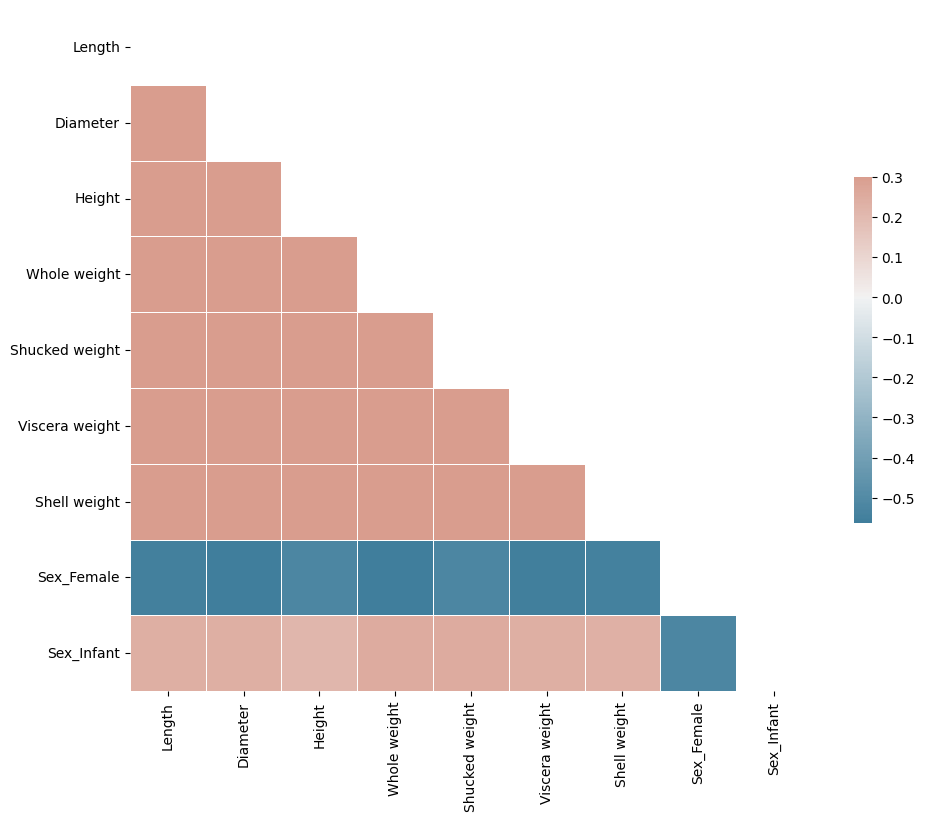

In [32]:

# Compute the correlation matrix
corr = X_reg.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

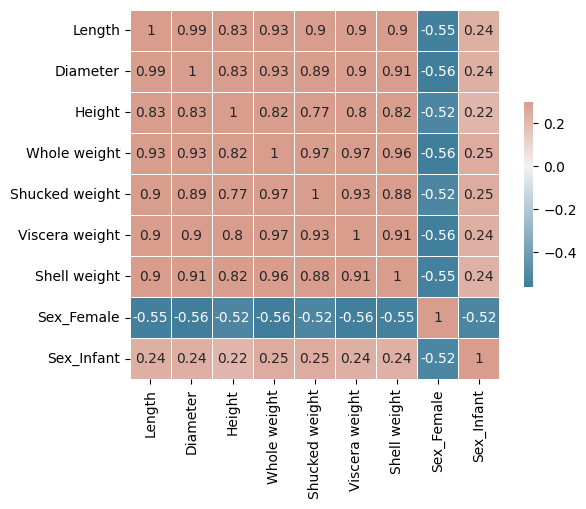

In [34]:
# Draw the heatmap with the mask and correct aspect ratio
# Here, we will not use the mask, and add the annotation to display the correlation scores
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### 회귀모델학습

In [36]:
# Initialize a linear regression model
model_reg = LinearRegression()

# Fit the model to the training data
model_reg.fit(X_train_reg, y_train_reg)

# Use the model to make predictions on the test data
y_pred_reg = model_reg.predict(X_test_reg)

# Calculate the performance metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("평균 제곱 오차 (Mean Squared Error, MSE):", mse)
print("평균 제곱근 오차 (Root Mean Squared Error, RMSE):", rmse)
print("평균 절대 오차 (Mean Absolute Error, MAE):", mae)
print("결정 계수 (R^2 Score):", r2)

평균 제곱 오차 (Mean Squared Error, MSE): 4.891232447128579
평균 제곱근 오차 (Root Mean Squared Error, RMSE): 2.2116130871218362
평균 절대 오차 (Mean Absolute Error, MAE): 1.5931067816608366
결정 계수 (R^2 Score): 0.5481628137889263


- 평균 제곱 오차 (MSE)와 평균 제곱근 오차 (RMSE)는 실제 값과 예측 값의 차이를 제곱하여 평균한 값입니다. 이 값이 작을수록 모델의 성능이 좋다고 할 수 있습니다.

- 평균 절대 오차 (MAE)는 실제 값과 예측 값의 차이를 절대값으로 변환하여 평균한 값입니다. 이 값도 작을수록 모델의 성능이 좋다고 할 수 있습니다.

- 결정 계수 (R^2 Score)는 회귀 모델이 데이터를 얼마나 잘 설명하는지를 나타내는 지표입니다. 이 값이 1에 가까울수록 모델이 데이터를 잘 설명하고 있다고 할 수 있습니다.

### 라쏘 회귀모델 학습

In [39]:
# Initialize a lasso regression model
lasso_reg = Lasso()

parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


# Perform grid search
grid_search = GridSearchCV(lasso_reg, parameters, cv=5)
grid_search.fit(X_train_reg, y_train_reg)

# Get the best model
best_model = grid_search.best_estimator_

# Use the model to make predictions on the test data
y_pred_reg = best_model.predict(X_test_reg)

# Calculate the performance metrics
lasso_mse = mean_squared_error(y_test_reg, y_pred_reg)
lasso_rmse = np.sqrt(mse)
lasso_mae = mean_absolute_error(y_test_reg, y_pred_reg)
lasso_r2 = r2_score(y_test_reg, y_pred_reg)

print("평균 제곱 오차 (Mean Squared Error, MSE):", lasso_mse)
print("평균 제곱근 오차 (Root Mean Squared Error, RMSE):", lasso_rmse)
print("평균 절대 오차 (Mean Absolute Error, MAE):", lasso_mae)
print("결정 계수 (R^2 Score):", lasso_r2)

평균 제곱 오차 (Mean Squared Error, MSE): 4.9026027263040755
평균 제곱근 오차 (Root Mean Squared Error, RMSE): 2.2116130871218362
평균 절대 오차 (Mean Absolute Error, MAE): 1.5966274207537745
결정 계수 (R^2 Score): 0.5471124619594796


### 특성 스케일링 - 표준화 후 성능 메트릭

In [41]:
# Initialize a standard scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the data
X_train_scaled = scaler.fit_transform(X_train_reg)

# Transform the test data
X_test_scaled = scaler.transform(X_test_reg)

# Perform grid search with the scaled data
grid_search = GridSearchCV(lasso_reg, parameters, cv=5)
grid_search.fit(X_train_scaled, y_train_reg)

# Get the best model
best_model = grid_search.best_estimator_

# Use the model to make predictions on the test data
y_pred_reg = best_model.predict(X_test_scaled)

# Calculate the performance metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

mse, rmse, mae, r2

(4.892088251403887, 2.211806558314693, 1.5937039686546304, 0.5480837571912522)